# Deep learning - Recurrent Neural Network (RNN)

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [34]:
df = pd.read_csv('air_quality_daily.csv')

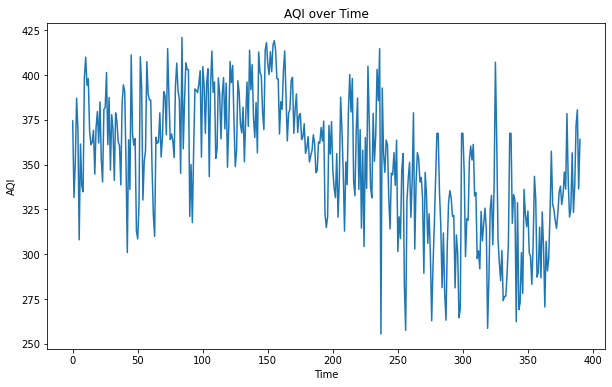

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(df['AQI'])
plt.title('AQI over Time')
plt.xlabel('Time')
plt.ylabel('AQI')
plt.show()

In [36]:
# set the datetime column as index
df['DateTime'] = pd.to_datetime(df['DateTime'])
df = df.set_index('DateTime')

# extract the AQI column as target variable
target_col = 'AQI'
target = df[target_col].values

# extract the input features
features = df.drop(columns=[target_col]).values

# normalize the input features and target variable
scaler = MinMaxScaler()
features = scaler.fit_transform(features)
target = scaler.fit_transform(target.reshape(-1, 1))

In [37]:
# split the dataset into training and testing sets
train_size = int(len(df) * 0.8)
train_features, test_features = features[:train_size], features[train_size:]
train_target, test_target = target[:train_size], target[train_size:]

# reshape the input data into a 3D array (samples, timesteps, features)
timesteps = 1
train_features = train_features.reshape((train_features.shape[0], timesteps, train_features.shape[1]))
test_features = test_features.reshape((test_features.shape[0], timesteps, test_features.shape[1]))

In [38]:
# build the RNN model
model = Sequential()
model.add(SimpleRNN(32, input_shape=(train_features.shape[1], train_features.shape[2]), activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [39]:
# train the model
history = model.fit(train_features, train_target, epochs=50, batch_size=16, validation_data=(test_features, test_target), verbose=2, shuffle=False)

Epoch 1/50
20/20 - 1s - loss: 0.3794 - val_loss: 0.1073 - 1s/epoch - 62ms/step
Epoch 2/50
20/20 - 0s - loss: 0.1815 - val_loss: 0.0448 - 80ms/epoch - 4ms/step
Epoch 3/50
20/20 - 0s - loss: 0.0851 - val_loss: 0.0362 - 65ms/epoch - 3ms/step
Epoch 4/50
20/20 - 0s - loss: 0.0531 - val_loss: 0.0432 - 81ms/epoch - 4ms/step
Epoch 5/50
20/20 - 0s - loss: 0.0457 - val_loss: 0.0445 - 65ms/epoch - 3ms/step
Epoch 6/50
20/20 - 0s - loss: 0.0432 - val_loss: 0.0418 - 86ms/epoch - 4ms/step
Epoch 7/50
20/20 - 0s - loss: 0.0413 - val_loss: 0.0389 - 65ms/epoch - 3ms/step
Epoch 8/50
20/20 - 0s - loss: 0.0394 - val_loss: 0.0366 - 70ms/epoch - 4ms/step
Epoch 9/50
20/20 - 0s - loss: 0.0374 - val_loss: 0.0346 - 89ms/epoch - 4ms/step
Epoch 10/50
20/20 - 0s - loss: 0.0354 - val_loss: 0.0326 - 85ms/epoch - 4ms/step
Epoch 11/50
20/20 - 0s - loss: 0.0335 - val_loss: 0.0307 - 81ms/epoch - 4ms/step
Epoch 12/50
20/20 - 0s - loss: 0.0317 - val_loss: 0.0295 - 68ms/epoch - 3ms/step
Epoch 13/50
20/20 - 0s - loss: 0.0302 

In [40]:
# evaluate the model
test_loss = model.evaluate(test_features, test_target, verbose=0)
print(f'Test loss: {test_loss}')

Test loss: 0.024236110970377922


3/3 [==============================] - 0s 3ms/step


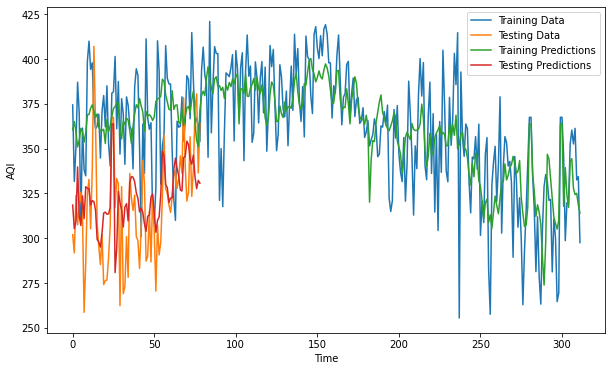

In [41]:
# make predictions
train_predict = model.predict(train_features)
test_predict = model.predict(test_features)

# inverse transform the predictions and target variable to get the actual AQI values
train_predict = scaler.inverse_transform(train_predict)
train_target = scaler.inverse_transform(train_target)
test_predict = scaler.inverse_transform(test_predict)
test_target = scaler.inverse_transform(test_target)

# plot the predicted and actual AQI values
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(train_target, label='Training Data')
plt.plot(test_target, label='Testing Data')
plt.plot(train_predict, label='Training Predictions')
plt.plot(test_predict, label='Testing Predictions')
plt.xlabel('Time')
plt.ylabel('AQI')
plt.legend()
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

# calculate MSE
train_mse = mean_squared_error(train_target, train_predict)
test_mse = mean_squared_error(test_target, test_predict)

# calculate R2
train_r2 = r2_score(train_target, train_predict)
test_r2 = r2_score(test_target, test_predict)

print('Training MSE: %.3f' % train_mse)
print('Testing MSE: %.3f' % test_mse)
print('Training R2: %.3f' % train_r2)
print('Testing R2: %.3f' % test_r2)

Training MSE: 583.205
Testing MSE: 663.913
Training R2: 0.487
Testing R2: 0.236
